In [2]:
# # pip install lifelines --user
import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("lung.csv", index_col = 0)
data.head()

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [4]:
data.shape

(228, 10)

In [5]:
data.dtypes

inst         float64
time           int64
status         int64
age            int64
sex            int64
ph.ecog      float64
ph.karno     float64
pat.karno    float64
meal.cal     float64
wt.loss      float64
dtype: object

In [6]:
data = data[['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno','pat.karno', 'meal.cal', 'wt.loss']]
data["status"] = data["status"] - 1
data["sex"] = data["sex"] - 1
data.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,306,1,74,0,1.0,90.0,100.0,1175.0,NaN
2,455,1,68,0,0.0,90.0,90.0,1225.0,15.0
3,1010,0,56,0,0.0,90.0,90.0,NaN,15.0
4,210,1,57,0,1.0,90.0,60.0,1150.0,11.0
5,883,1,60,0,0.0,100.0,90.0,NaN,0.0


In [7]:
data.isnull().sum()

time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64

In [8]:
data.columns

Index(['time', 'status', 'age', 'sex', 'ph.ecog', 'ph.karno', 'pat.karno',
       'meal.cal', 'wt.loss'],
      dtype='object')

In [9]:
# 直接替换整列
data["ph.karno"] = data["ph.karno"].fillna(data["ph.karno"].mean())
data["pat.karno"] = data["pat.karno"].fillna(data["pat.karno"].mean())
data["meal.cal"] = data["meal.cal"].fillna(data["meal.cal"].mean())
data["wt.loss"] = data["wt.loss"].fillna(data["wt.loss"].mean())
data.dropna(inplace=True)
data["ph.ecog"] = data["ph.ecog"].astype("int64")

In [10]:
data.isnull().sum()

time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64

In [11]:
data.shape

(227, 9)

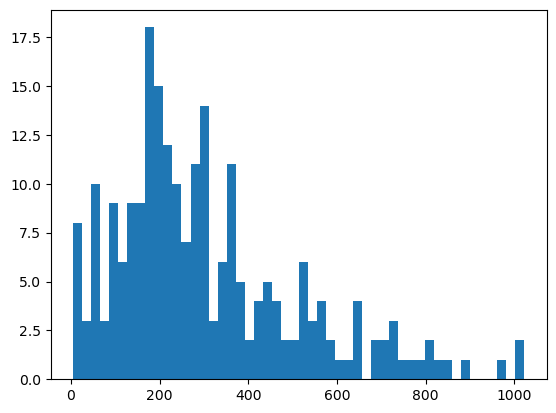

In [12]:
T = data["time"]
E = data["status"]
plt.hist(T, bins = 50)
plt.show()

<Axes: xlabel='timeline'>

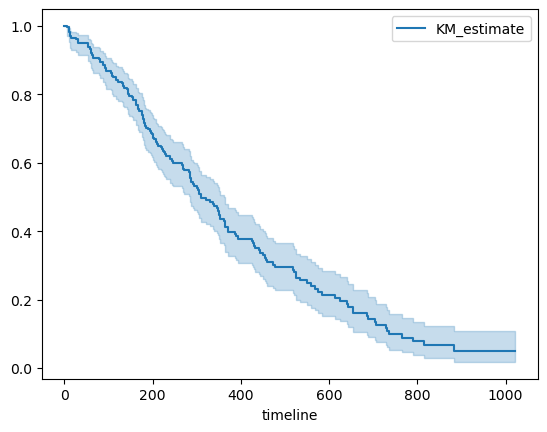

In [13]:
#Fitting a non-parametric model [Kaplan Meier Curve]
kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
kmf.plot_survival_function()

Text(0.5, 1.0, 'Survival function')

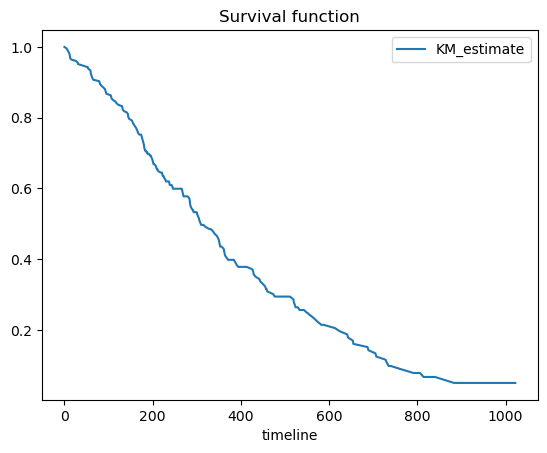

In [14]:
kmf.survival_function_.plot()
plt.title('Survival function')

<Axes: xlabel='timeline'>

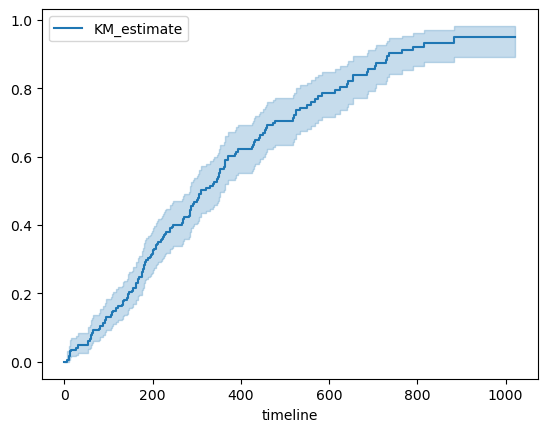

In [15]:
kmf.plot_cumulative_density()

In [16]:
kmf.median_survival_time_

310.0

In [17]:
from lifelines.utils import median_survival_times

median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print(median_)
print(median_confidence_interval_)

310.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                   284.0                   361.0


Text(0.5, 1.0, 'Survival of different gender group')

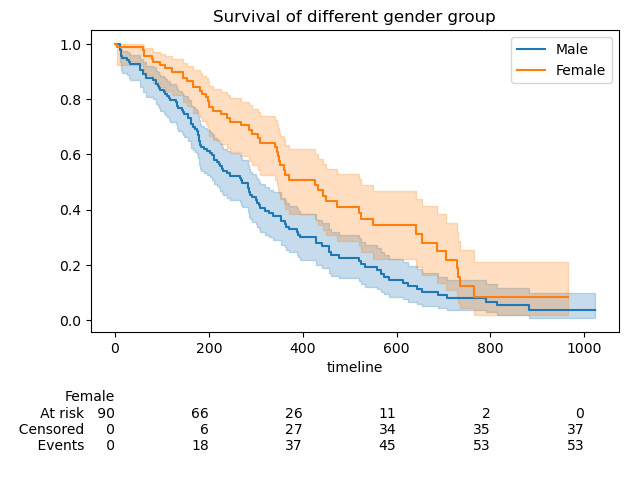

In [18]:
ax = plt.subplot(111)

m = (data["sex"] == 0)

kmf.fit(durations = T[m], event_observed = E[m], label = "Male")
kmf.plot_survival_function(ax = ax)

kmf.fit(T[~m], event_observed = E[~m], label = "Female")
kmf.plot_survival_function(ax = ax, at_risk_counts = True)

plt.title("Survival of different gender group")

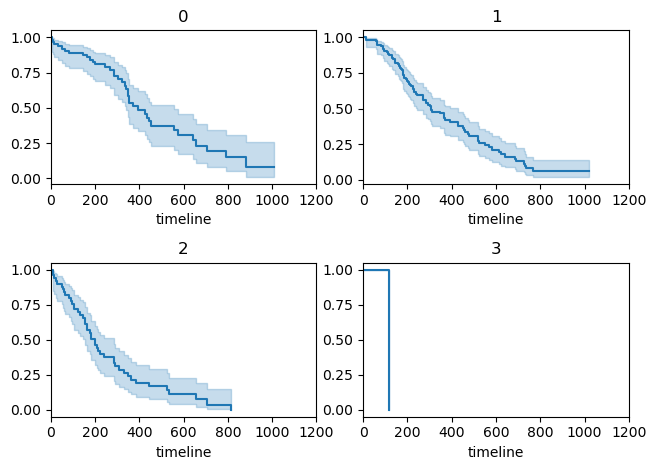

In [19]:
ecog_types = data.sort_values(by = ['ph.ecog'])["ph.ecog"].unique()

for i, ecog_types in enumerate(ecog_types):
    ax = plt.subplot(2, 2, i + 1)
    ix = data['ph.ecog'] == ecog_types
    kmf.fit(T[ix], E[ix], label = ecog_types)
    kmf.plot_survival_function(ax = ax, legend = False)
    plt.title(ecog_types)
    plt.xlim(0, 1200)

plt.tight_layout()